# Maternal Health Risk Analysis and Classification

In [229]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

### Loading dataset

In [230]:
df = pd.read_csv("Maternal Health Risk Data Set.csv")

In [231]:
df.shape

(1014, 7)

##### we have 1014 data entries and 7 columns

In [232]:
for i in df.columns:
    print(i,end=", ")

Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel, 

##### We have Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate, RiskLevel as columns

In [233]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.27300,98.0,86,high risk
1,35,140,90,234.23660,98.0,70,high risk
2,29,90,70,144.14560,100.0,80,high risk
3,30,140,85,126.12740,98.0,70,high risk
4,35,120,60,109.91102,98.0,76,low risk


# Checking Null values

In [234]:
df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

###### So no values are Null or incomplete 

# Checking for duplicated rows

In [235]:
df.duplicated().any()

True

In [236]:
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.27300,98.0,86,high risk
1,35,140,90,234.23660,98.0,70,high risk
2,29,90,70,144.14560,100.0,80,high risk
3,30,140,85,126.12740,98.0,70,high risk
4,35,120,60,109.91102,98.0,76,low risk


In [237]:
df.duplicated(keep='first').sum()

562

In [238]:
df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list()).head(20)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
670,10,100,50,108.10920,99.0,70,mid risk
849,10,100,50,108.10920,99.0,70,mid risk
552,12,90,60,135.13650,102.0,60,low risk
940,12,90,60,135.13650,102.0,60,low risk
543,12,90,60,135.13650,102.0,66,low risk
934,12,90,60,135.13650,102.0,66,low risk
588,12,90,60,135.13650,102.0,66,mid risk
827,12,90,60,135.13650,102.0,66,mid risk
171,12,90,60,142.34378,102.0,66,high risk
963,12,90,60,142.34378,102.0,66,high risk


##### So out of 1014 entries, 562 data entries are duplicate. Seeing the data it is my observation that there are too many duplicated entries. Such entries cannot be of diffrent patients. So we will remove these entries

In [239]:
df.drop_duplicates(inplace=True)

##### So we are only left with 452 entries

In [240]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.27300,98.0,86,high risk
1,35,140,90,234.23660,98.0,70,high risk
2,29,90,70,144.14560,100.0,80,high risk
3,30,140,85,126.12740,98.0,70,high risk
4,35,120,60,109.91102,98.0,76,low risk


# EDA

### Risk Level

In [241]:
x= df['RiskLevel'].value_counts()
print(x)

low risk     234
high risk    112
mid risk     106
Name: RiskLevel, dtype: int64


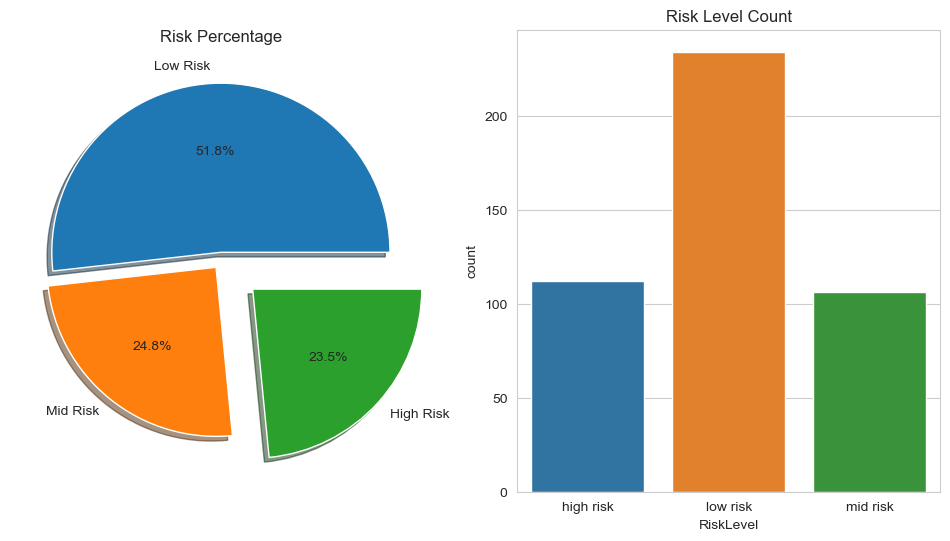

In [242]:
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Risk Percentage")
plt.pie(x,(0.05,0.05,0.25),['Low Risk','Mid Risk','High Risk'],shadow=1,autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(df,x='RiskLevel').set_title("Risk Level Count")
plt.show()

######  After analysing we conclude that the dataset is 23.5% high risk patients
1. low risk   -  234
2. mid risk   -  112
3. high risk  -  106

### now i will change the categorical variable to numerical variable for the ease of analysis

In [243]:
df.head(1)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.273,98.0,86,high risk


In [244]:
df['RiskLevel'] = df['RiskLevel'].replace({'low risk':1,'mid risk': 2,'high risk':3})

In [245]:
df.tail(3)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
703,15,100,49,136.93832,98.0,77,1
704,12,100,50,108.10920,98.0,70,2
705,21,100,50,122.52376,98.0,60,1


# --------------------------------------------------------------------

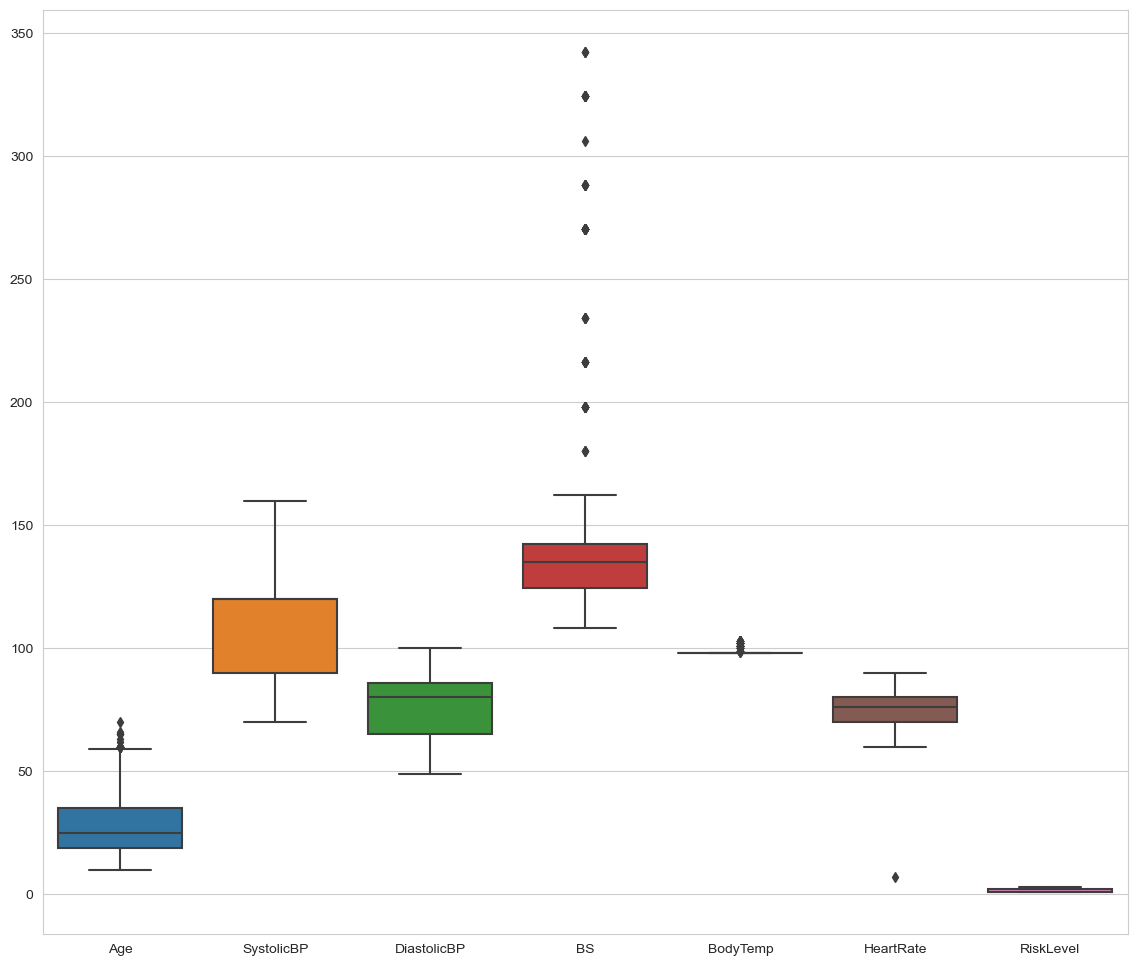

In [246]:
plt.figure(figsize=(14,12))
sns.boxplot(df)
plt.show()

#### From the box plot we can observe there are outliers present in the data, lets have a closure look on each one of the features

In [247]:
def ploter(df,col):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    
    sns.boxplot(df,y=col).set_title("Box Plot")
    
    plt.subplot(1,2,2)
    sns.histplot(df,x=col,kde=1).set_title("Histogram")
    plt.show()

# Age

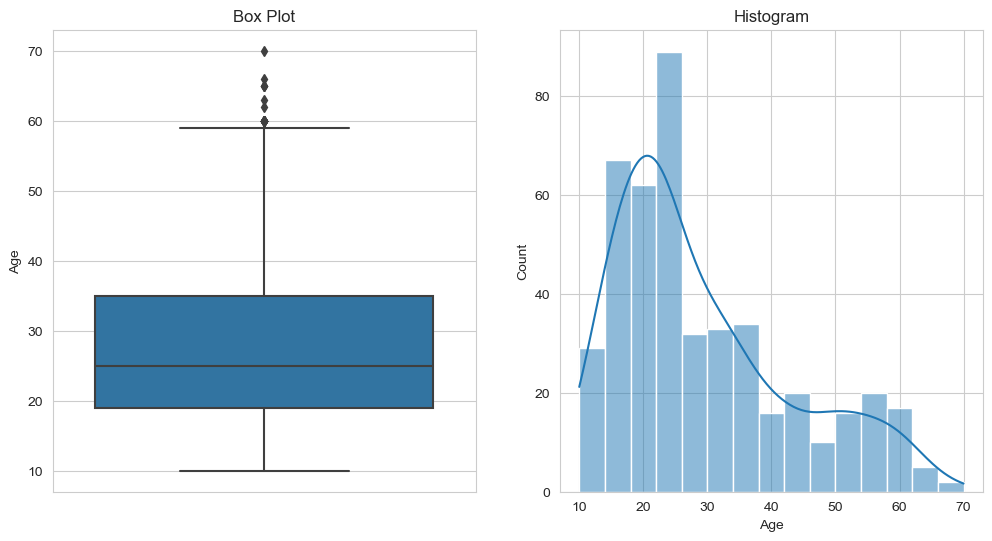

In [248]:
ploter(df,'Age')

In [252]:
print((df['Age']>=55).sum())
print((df['Age']<=15).sum())
print(df['Age'].mean())

42
61
29.194690265486727


In [250]:
# quartile
print(np.percentile(df['Age'],50))
print(np.percentile(df['Age'],75))

25.0
35.0


###### Observations :-- 
    1. There are outliers, according to boxplot
    2. According to (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5051232/) women get 
        menopause at age of 45 to 55 yrs
    3. There are 42 entries with age greater than equal to 55, which is not impossible 
        but is rare in india(IVF)
    4. Girls start to hit puberty at age of 8 to 15, so the records are not wrong here
    
    5. Age 20 to 25 sees the most number of pregnancy cases, but age b/w 14 to 18 also have a lot of 
        prgnancies
    6. 50% pregnancy are below 25 years of age and next 25% are below 35
    
    7. 61 cases below and at age of 15

# ----------------Describe----------------------------

In [253]:
df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000
mean,29.194690,110.553097,75.418142,150.383007,98.692478,73.949115,1.730088
std,13.767379,17.872282,13.754578,50.977254,1.410897,8.156973,0.833169
min,10.000000,70.000000,49.000000,108.109200,98.000000,7.000000,1.000000
25%,19.000000,90.000000,65.000000,124.325580,98.000000,70.000000,1.000000
50%,25.000000,120.000000,80.000000,135.136500,98.000000,76.000000,1.000000
75%,35.000000,120.000000,86.000000,142.343780,98.000000,80.000000,2.000000
max,70.000000,160.000000,100.000000,342.345800,103.000000,90.000000,3.000000


# ----------------Describe-----------------------------

# Systolic BP

In [254]:
df['SystolicBP'].describe()

count    452.000000
mean     110.553097
std       17.872282
min       70.000000
25%       90.000000
50%      120.000000
75%      120.000000
max      160.000000
Name: SystolicBP, dtype: float64

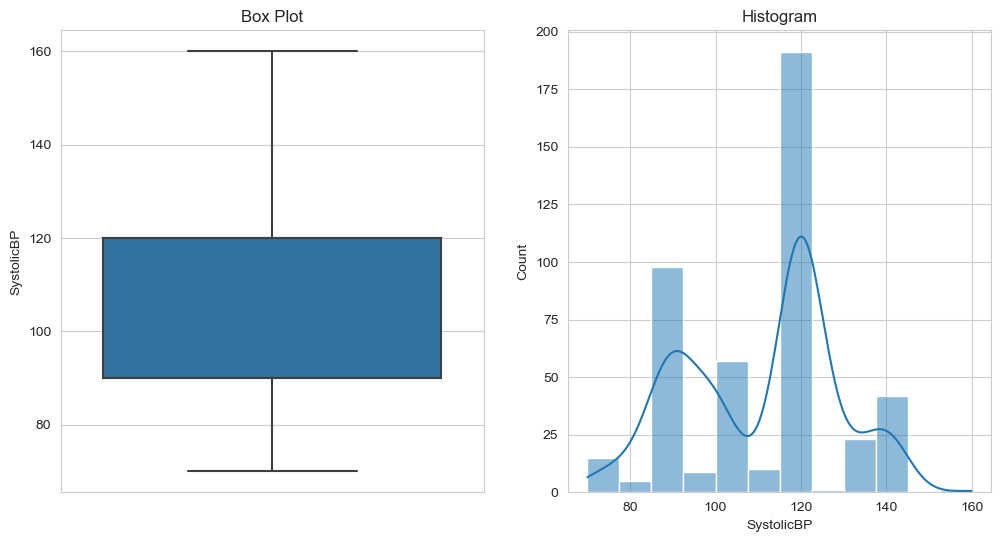

In [255]:
ploter(df,'SystolicBP')

In [256]:
print(df['SystolicBP'].min())
print(df['SystolicBP'].max())

70
160


# Diastolic_BP

In [257]:
df['DiastolicBP'].describe()

count    452.000000
mean      75.418142
std       13.754578
min       49.000000
25%       65.000000
50%       80.000000
75%       86.000000
max      100.000000
Name: DiastolicBP, dtype: float64

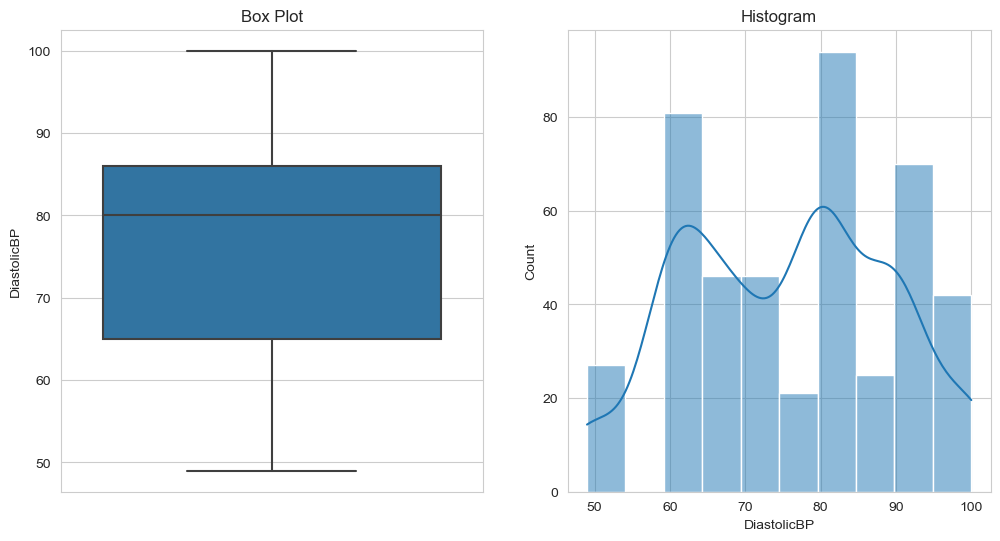

In [258]:
ploter(df, "DiastolicBP")

# Blood Sugar

In [259]:
df['BS'].describe()

count    452.000000
mean     150.383007
std       50.977254
min      108.109200
25%      124.325580
50%      135.136500
75%      142.343780
max      342.345800
Name: BS, dtype: float64

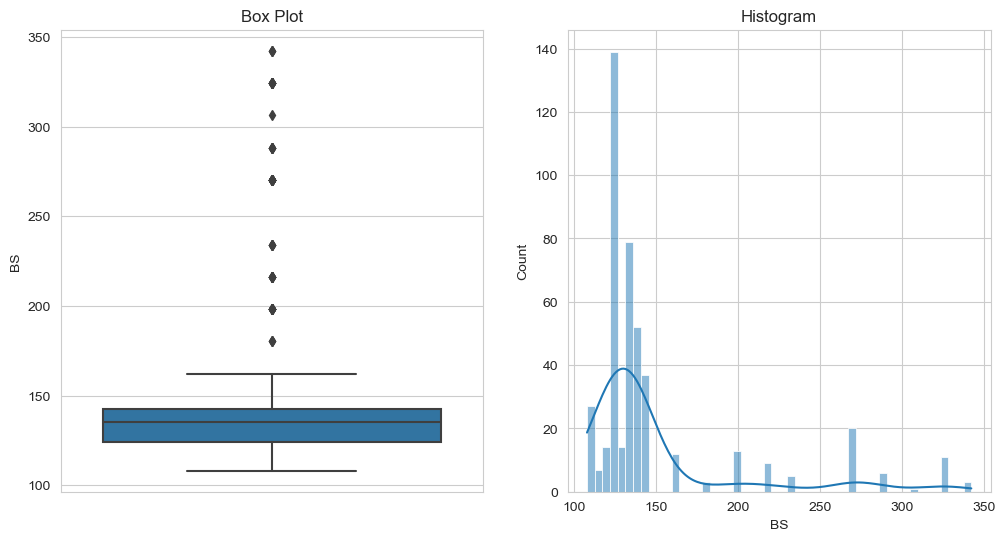

In [260]:
ploter(df,'BS')

In [264]:
df[(df['BS']>200) & (df['RiskLevel']<3)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
73,54,130,70,216.2184,98.0,67,2
74,44,120,90,288.2912,98.0,80,2
77,55,120,90,216.2184,98.0,70,2
91,60,120,85,270.2730,98.0,60,2
413,50,130,80,288.2912,102.0,76,2
444,43,130,80,324.3276,98.0,70,2
460,42,130,80,324.3276,98.0,70,2
555,50,130,100,288.2912,98.0,75,2


# Body Temprature

In [265]:
df['BodyTemp'].describe()

count    452.000000
mean      98.692478
std        1.410897
min       98.000000
25%       98.000000
50%       98.000000
75%       98.000000
max      103.000000
Name: BodyTemp, dtype: float64

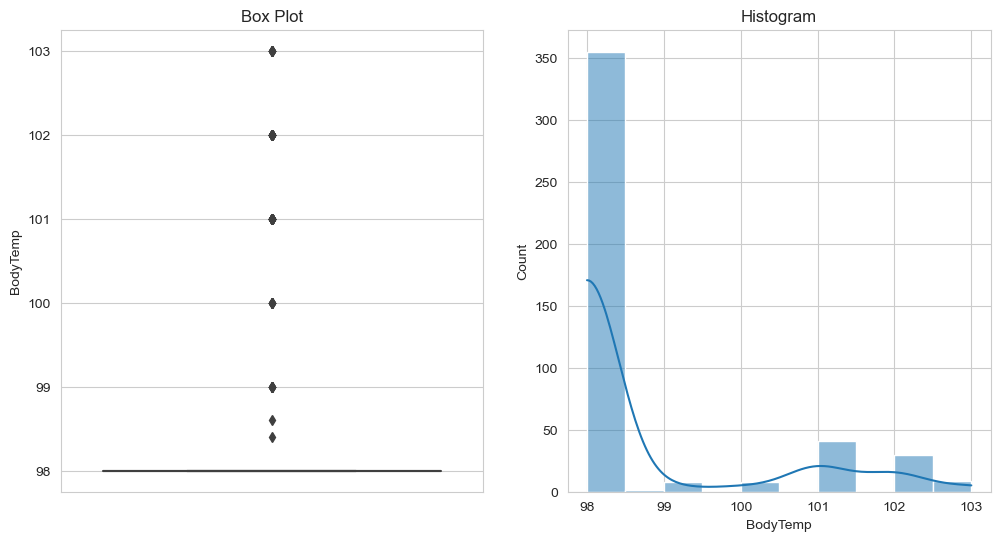

In [266]:
ploter(df,'BodyTemp')

In [274]:
df[(df['BodyTemp']>=101) & (df['RiskLevel']<2)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
35,12,95,60,109.91102,102.0,60,1
337,45,120,80,124.32558,103.0,70,1
338,70,85,60,124.32558,102.0,70,1
339,65,120,90,124.32558,103.0,76,1
340,55,120,80,124.32558,102.0,80,1
342,22,120,80,124.32558,103.0,76,1
469,30,120,80,122.52376,101.0,76,1
472,18,120,80,122.52376,102.0,76,1
474,17,90,60,142.34378,101.0,76,1
493,17,85,60,142.34378,102.0,86,1


# Heart Rate

In [275]:
df['HeartRate'].describe()

count    452.000000
mean      73.949115
std        8.156973
min        7.000000
25%       70.000000
50%       76.000000
75%       80.000000
max       90.000000
Name: HeartRate, dtype: float64

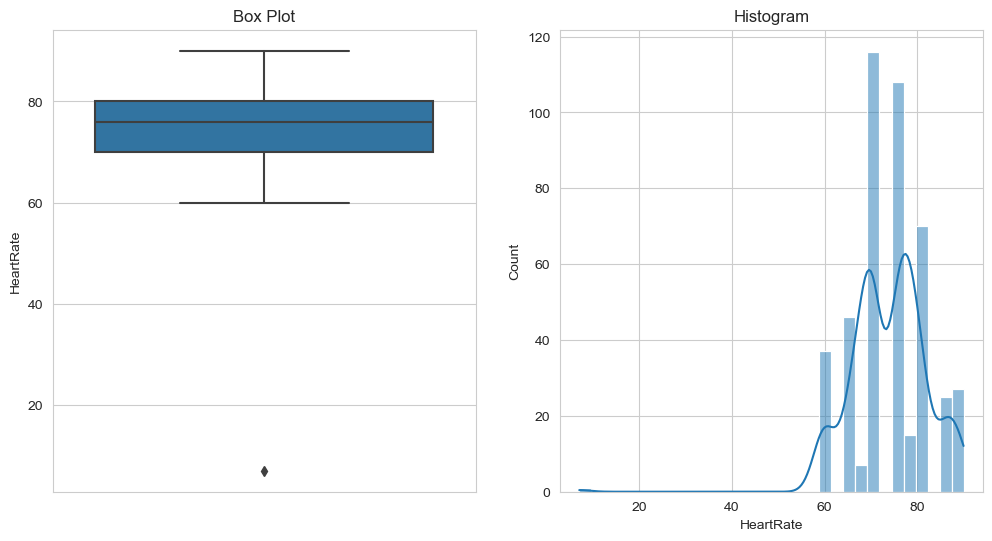

In [276]:
ploter(df,'HeartRate')

#### Observations:
    1. So there is and outlier at 7, which is not possible so we will remove this

In [290]:
df.drop(df[df['HeartRate']==7].index,inplace=True)

In [292]:
df['HeartRate'].describe()

count    451.000000
mean      74.097561
std        7.530045
min       60.000000
25%       70.000000
50%       76.000000
75%       80.000000
max       90.000000
Name: HeartRate, dtype: float64

In [278]:
df.shape

(452, 7)

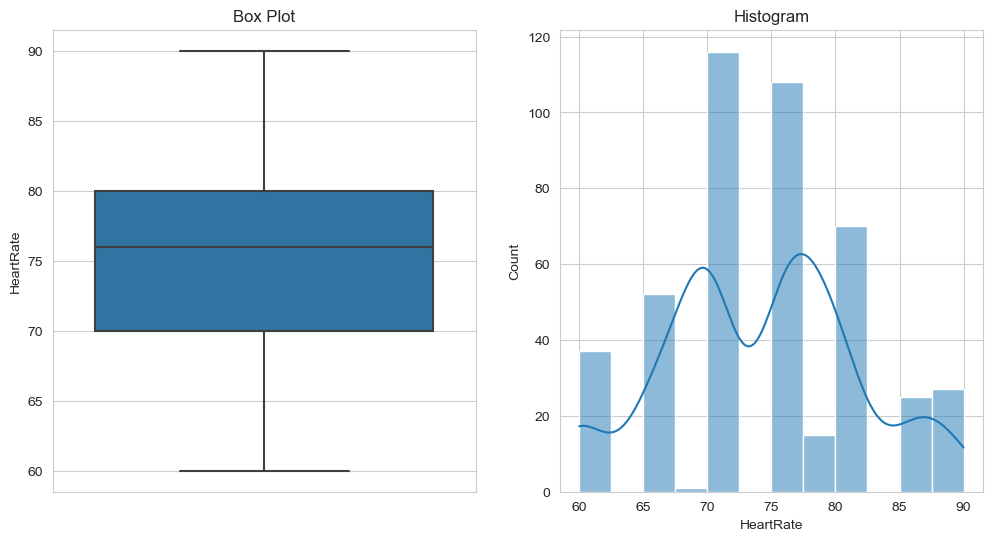

In [293]:
ploter(df,'HeartRate')

### Observations:
    1. The values appear normal so far

# Now lets go for bivariate

### Correlation

In [295]:
df.corr()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
Age,1.000000,0.377560,0.348137,0.376675,-0.190133,0.065055,0.181484
SystolicBP,0.377560,1.000000,0.790284,0.347837,-0.206810,0.003854,0.328777
DiastolicBP,0.348137,0.790284,1.000000,0.300421,-0.202079,-0.018462,0.254398
BS,0.376675,0.347837,0.300421,1.000000,-0.042696,0.143943,0.549064
BodyTemp,-0.190133,-0.206810,-0.202079,-0.042696,1.000000,0.084947,0.259035
HeartRate,0.065055,0.003854,-0.018462,0.143943,0.084947,1.000000,0.181593
RiskLevel,0.181484,0.328777,0.254398,0.549064,0.259035,0.181593,1.000000


<Axes: >

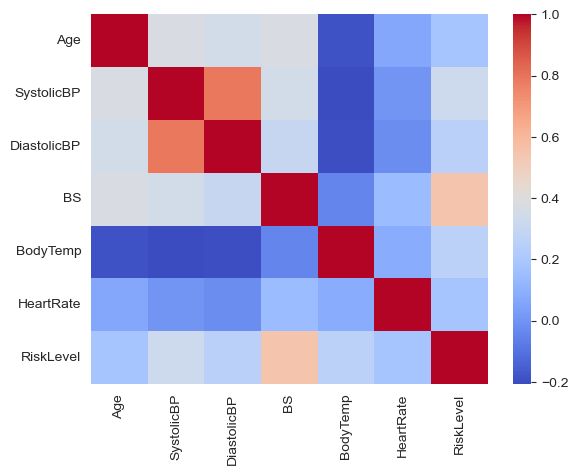

In [304]:
sns.heatmap(df.corr(),cmap='coolwarm')

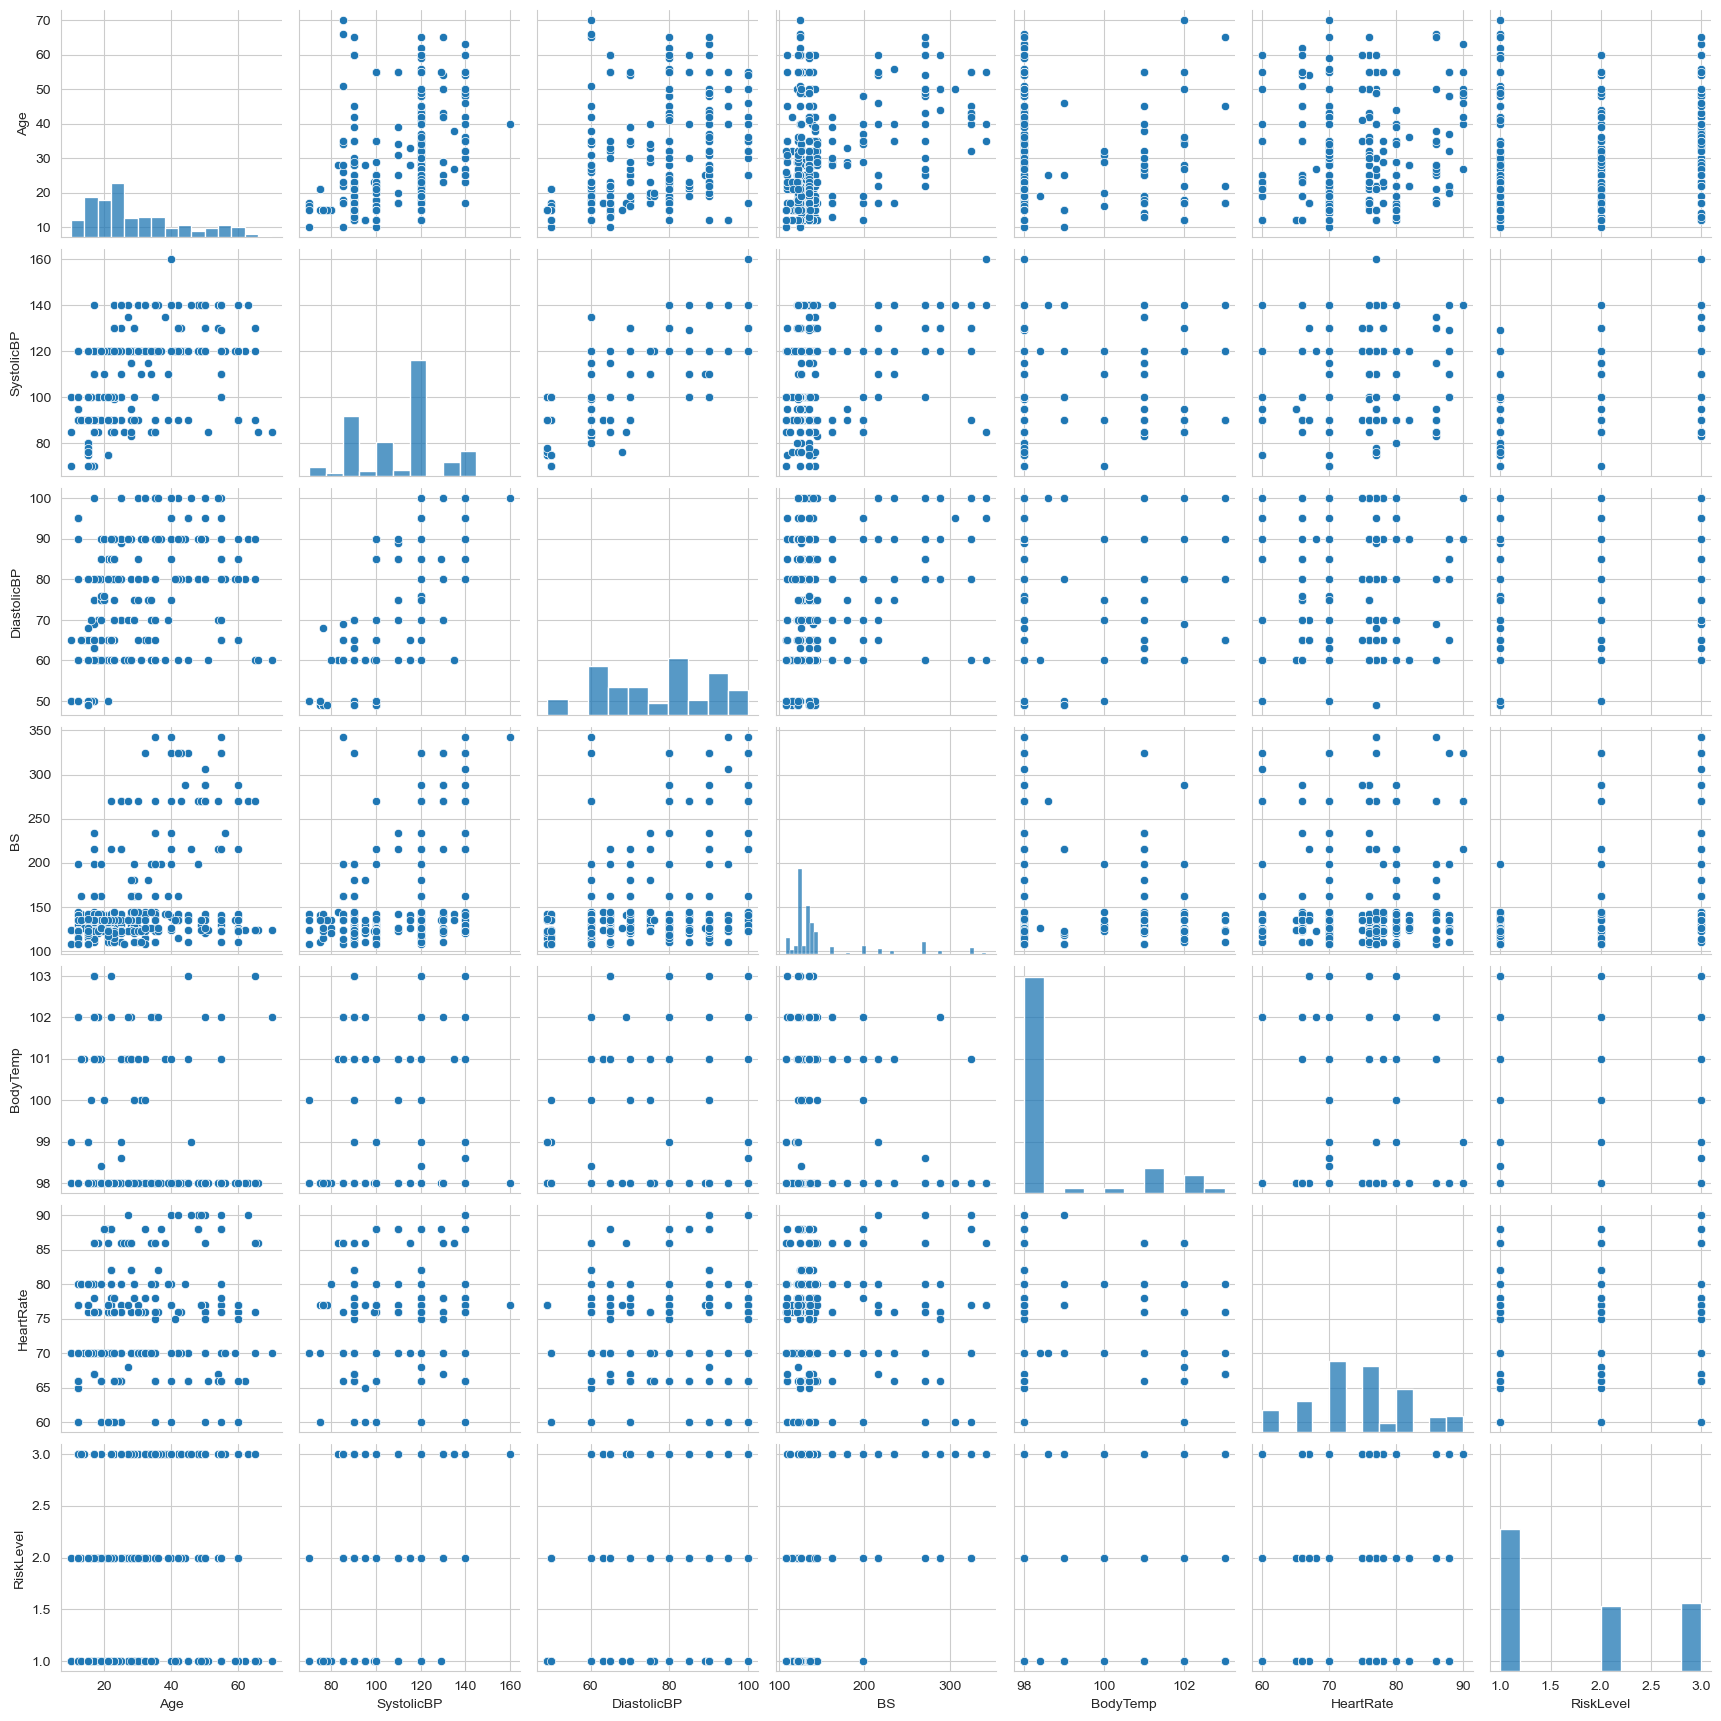

In [311]:
sns.pairplot(df)
plt.show()

<Axes: xlabel='DiastolicBP', ylabel='SystolicBP'>

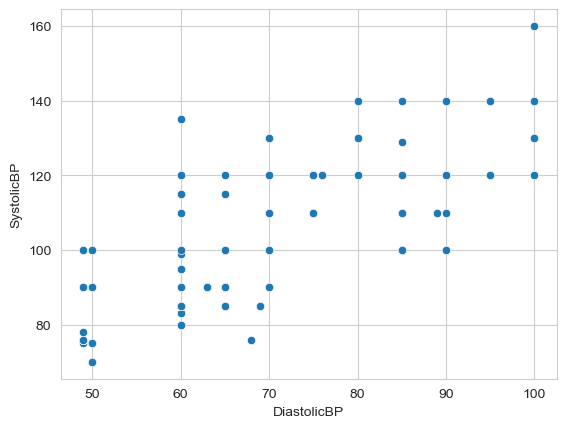

In [313]:
sns.scatterplot(df,x='DiastolicBP',y='SystolicBP')

# ---------------------------------------------------------------------


# Affect of Features on Output


# ---------------------------------------------------------------------

## Age -> Risk

<Axes: xlabel='Age', ylabel='Count'>

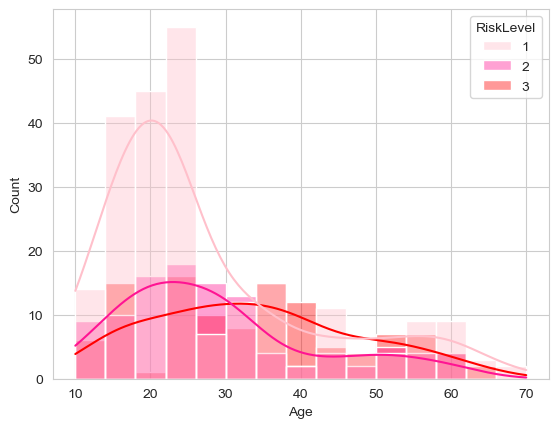

In [341]:
sns.histplot(df,x='Age',hue='RiskLevel',palette=['pink', '#FF1493', 'red'],kde=True,alpha=0.4)

# SystolicBP → RiskLevel

<Axes: xlabel='SystolicBP', ylabel='Count'>

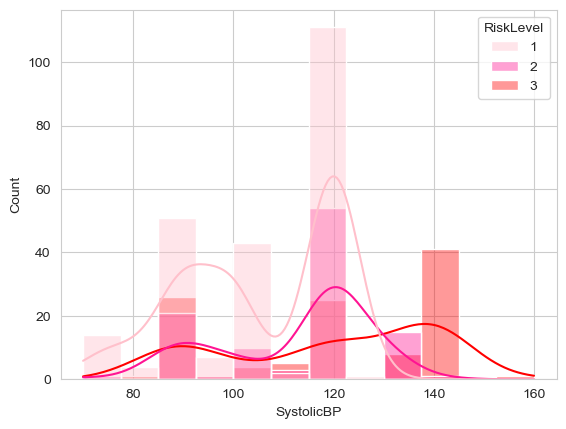

In [340]:
sns.histplot(df,x='SystolicBP',hue='RiskLevel',palette=['pink', '#FF1493', 'red'],kde=True,alpha=0.4)

# DiastolicBP → RiskLevel

<Axes: xlabel='DiastolicBP', ylabel='Count'>

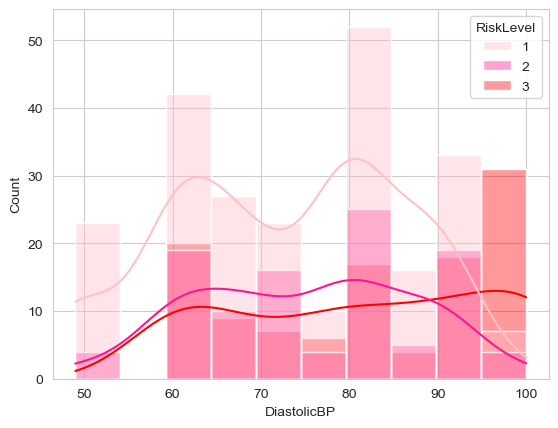

In [350]:
sns.histplot(df,x='DiastolicBP',hue='RiskLevel',palette=['pink', '#FF1493', 'red'],kde=True,alpha=0.4)

# BS → RiskLevel

<Axes: xlabel='BS', ylabel='Count'>

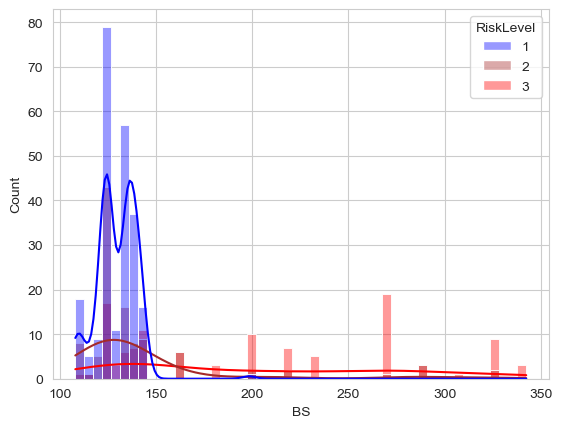

In [351]:
sns.histplot(df,x='BS',hue='RiskLevel',palette=['blue', 'brown', 'red'],kde=True,alpha=0.4)

# BodyTemp → RiskLevel

<Axes: xlabel='BodyTemp', ylabel='Count'>

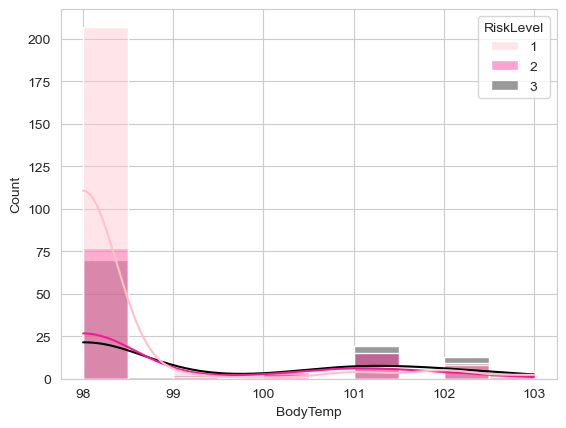

In [355]:
sns.histplot(df,x='BodyTemp',hue='RiskLevel',palette=['pink', '#FF1493', 'black'],kde=True,alpha=0.4)

# HeartRate → RiskLevela

<Axes: xlabel='HeartRate', ylabel='Count'>

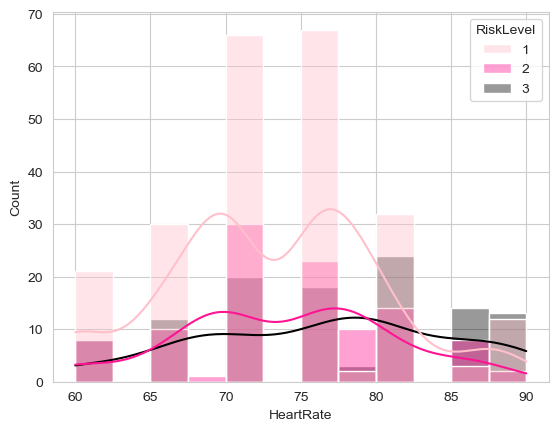

In [356]:
sns.histplot(df,x='HeartRate',hue='RiskLevel',palette=['pink', '#FF1493', 'black'],kde=True,alpha=0.4)

# ----------------------------------------------------------------------

# Affect Of 2 Features on Output

# ------------------------------------------------------------------------

In [357]:
df.head(1)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,270.273,98.0,86,3


## Age & SystolicBP → RiskLevel

<Axes: xlabel='Age', ylabel='SystolicBP'>

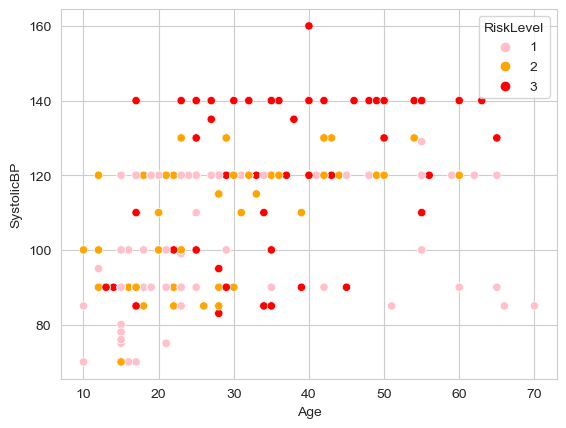

In [388]:
sns.scatterplot(df,x='Age',y='SystolicBP',hue="RiskLevel",palette=['Pink', 'orange', 'Red'])

### Age & DiastolicBP → RiskLevel

<Axes: xlabel='Age', ylabel='DiastolicBP'>

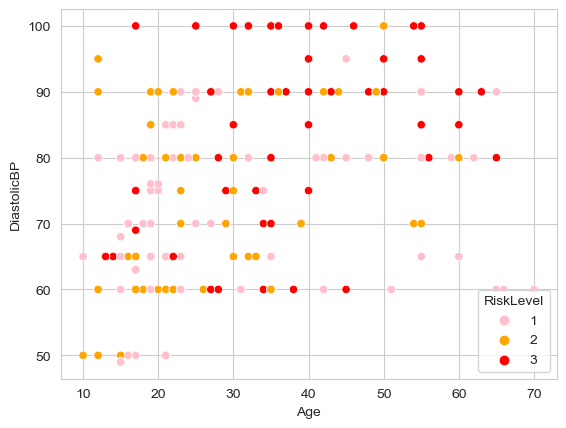

In [387]:
sns.scatterplot(df,x='Age',y='DiastolicBP',hue="RiskLevel",palette=['Pink', 'orange', 'Red'])

### Age and BloodSugar → RiskLevel

<Axes: xlabel='Age', ylabel='BS'>

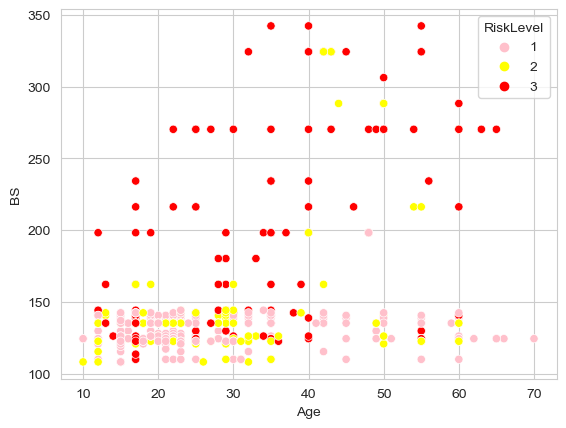

In [369]:
sns.scatterplot(df,x='Age',y='BS',hue="RiskLevel",palette=['Pink', 'yellow', 'Red'])

### Age and BodyTemprature → RiskLevel

<Axes: xlabel='Age', ylabel='BodyTemp'>

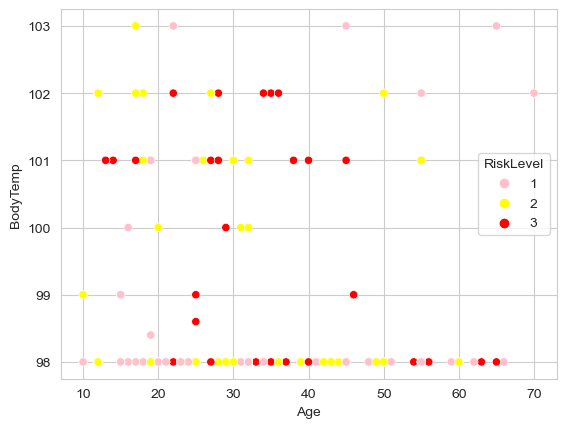

In [371]:
sns.scatterplot(df,x='Age',y='BodyTemp',hue="RiskLevel",palette=['Pink', 'yellow', 'Red'])

### Age and HeartRate → RiskLevel

<Axes: xlabel='Age', ylabel='HeartRate'>

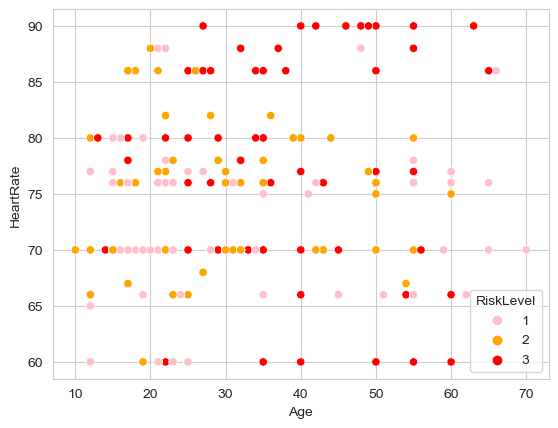

In [386]:
sns.scatterplot(df,x='Age',y='HeartRate',hue="RiskLevel",palette=['Pink', 'orange', 'Red'])

# SystolicBP and DiastolicBP → RiskLevel

<Axes: xlabel='SystolicBP', ylabel='DiastolicBP'>

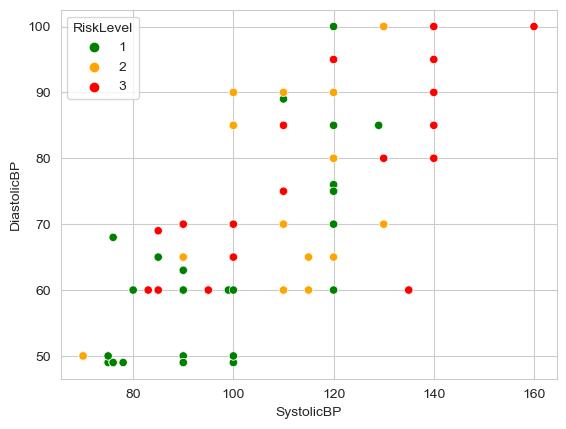

In [385]:
sns.scatterplot(df,x='SystolicBP',y='DiastolicBP',hue="RiskLevel",palette=['green', 'orange', 'Red'])